# Netoyage des données

## Les  imports

In [1]:
# !pip install fastparquet

In [ ]:
## Modifier le WorkDirectory
wdir = '/tmp/gas'
os.chdir(wdir)

In [2]:
#!pip install geopy

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from geopy.geocoders import Nominatim

In [9]:
print('current work dir is:', os.getcwd())

current work dir is: /home/houcine/workspace/school-eda-serviceStations


In [10]:
# limiter le nombre de lignes à afficher à 10
# au lieu de faire un head() + un tail() il suffira d'afficher la DataFrame
pd.options.display.max_rows = 10

## Typage des DataFrames

### netoyage de **pdv**

In [11]:
pdv = pd.read_csv('pdv.csv')

/home/houcine/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Les valeurs manquantes

In [12]:
pdv.loc[:,"longitude"] /= 100000
pdv.loc[:,"latitude"] /= 100000

In [13]:
pdv

,annee,id,latitude,longitude,cp,pop,ouverture_debut,ouverture_fin,ouverture_saufjour,adresse,ville
0,2019,1000001,46.201140,5.197910,1000,R,NaN,NaN,NaN,596 AVENUE DE TREVOUX,SAINT-DENIS-LèS-BOURG
1,2019,1000002,46.218420,5.227670,1000,R,NaN,NaN,NaN,16 Avenue de Marboz,BOURG-EN-BRESSE
2,2019,1000004,46.188000,5.245000,1000,R,NaN,NaN,NaN,20 Avenue du Maréchal Juin,Bourg-en-Bresse
3,2019,1000005,46.200936,5.199420,1000,R,NaN,NaN,NaN,642 Avenue de Trévoux,SAINT-DENIS-LèS-BOURG
4,2019,1000006,46.207540,5.237580,1000,R,NaN,NaN,NaN,1 Boulevard John Kennedy,BOURG-EN-BRESSE
...,...,...,...,...,...,...,...,...,...,...,...
92964,2015,42155001,45.992561,3.983353,42155,R,01:00:00,01:00:00,NaN,RUE DE LA BRUYERE,LENTIGNY
92965,2015,42160002,45.525310,4.210760,42160,R,01:00:00,01:00:00,Lundi;Mardi;Mercredi;Jeudi;Vendredi;Samedi;Dim...,12 Avenue de Sury,BONSON
92966,2015,42160003,45.526680,4.259270,42160,R,06:30:00,20:30:00,NaN,2 Avenue de Saint-Ãtienne,Andrézieux-Bouthéon
92967,2015,42160004,45.526410,4.263940,42160,R,01:00:00,01:00:00,NaN,ZAC de Migalon,ANDRéZIEUX-BOUTHéON


In [14]:
# France metropol :
# latitude between 42 and 51
# longitude between -5 and 10

In [114]:
# latitude et longi ne sont pas toujours inversées; elles veulent rien dire parfois
a = pdv.loc[(42 <= pdv.longitude) & (pdv.longitude <= 51) & (-5 <= pdv.latitude) & (pdv.latitude <= 10)]

In [115]:
a

,annee,id,latitude,longitude,cp,pop,ouverture_debut,ouverture_fin,ouverture_saufjour,adresse,ville
506,2019,6190006,7.480690,43.763940,6190,R,NaN,NaN,NaN,175 Avenue Louis Pasteur,ROQUEBRUNE-CAP-MARTIN
538,2019,6220004,7.062040,43.579880,6220,R,NaN,NaN,NaN,D6007,Vallauris
612,2019,6500001,7.520781,43.784070,6500,R,NaN,NaN,NaN,PORT DE GARAVAN,MENTON
733,2019,7300002,4.840095,45.057064,7300,R,NaN,NaN,NaN,RN 86 55 AV. DE NIMES,TOURNON-SUR-RHôNE
777,2019,8130001,4.580864,49.484853,8130,R,NaN,NaN,NaN,5 ROUTE DE CHARLEVILLE,ATTIGNY
...,...,...,...,...,...,...,...,...,...,...,...
92201,2015,35730001,-2.063011,48.584797,35730,R,01:00:00,01:00:00,NaN,2 rue des Terres Neuvas,PLEURTUIT
92462,2015,38170003,5.697010,45.175800,38170,R,01:00:00,01:00:00,NaN,115 Avenue de la République,SEYSSINET-PARISET
92528,2015,38340007,5.622725,45.304537,38340,R,06:30:00,20:15:00,NaN,RD1075 CRUE DE MOIRANS,VOREPPE
92920,2015,42000002,4.378090,45.465190,42000,R,01:00:00,01:00:00,NaN,11 Avenue de Verdun,SAINT-ÉTIENNE


In [117]:
import pgeocode
nomi = pgeocode.Nominatim('fr')


In [131]:
print(nomi.query_location("Île-de-France"))

None


In [124]:
for i in range(a.shape[0]):
    cp = a.loc[:,["cp"]].iloc[i,0]
    print(nomi.query_location("SAINT-ÉTIENNE
")

postal_code       6190
country code       NaN
place_name         NaN
state_name         NaN
state_code         NaN
                  ... 
community_name     NaN
community_code     NaN
latitude           NaN
longitude          NaN
accuracy           NaN
Name: 0, Length: 12, dtype: object
postal_code       6220
country code       NaN
place_name         NaN
state_name         NaN
state_code         NaN
                  ... 
community_name     NaN
community_code     NaN
latitude           NaN
longitude          NaN
accuracy           NaN
Name: 0, Length: 12, dtype: object
postal_code       6500
country code       NaN
place_name         NaN
state_name         NaN
state_code         NaN
                  ... 
community_name     NaN
community_code     NaN
latitude           NaN
longitude          NaN
accuracy           NaN
Name: 0, Length: 12, dtype: object
postal_code       7300
country code       NaN
place_name         NaN
state_name         NaN
state_code         NaN
                  ...

KeyboardInterrupt: 

In [116]:
geolocator = Nominatim(user_agent="nominatim.openstreetmap.org", timeout=3)
for i in range(a.shape[0]):
    lati  = a.loc[:,["longitude", "latitude"]].iloc[i,0]
    longi = a.loc[:,["longitude", "latitude"]].iloc[i,1]
    location = geolocator.reverse(lati,  longi)
    print(location.raw['address']['country_code'])
    try:
        print(location.raw['address']['postcode'], a.loc[:,["cp"]].iloc[i,0])
    except:
        print(location.raw['address'])

fr
32110 cp    6190
Name: 506, dtype: object
fr
32160 cp    6220
Name: 538, dtype: object
fr
32370 cp    6500
Name: 612, dtype: object
fr
33660 cp    7300
Name: 733, dtype: object
fr
{'state': 'France métropolitaine', 'country': 'France', 'country_code': 'fr'}
fr
65700 cp    13290
Name: 1253, dtype: object
fr
16290 cp    16000
Name: 1733, dtype: object
fr
86120 cp    18230
Name: 1994, dtype: object
fr
16250 cp    19510
Name: 2093, dtype: object
fr
49680 cp    21240
Name: 2311, dtype: object
fr
33190 cp    26780
Name: 2893, dtype: object
fr
72550 cp    29000
Name: 3121, dtype: object
fr
65700 cp    31600
Name: 3637, dtype: object
fr
24490 cp    38170
Name: 4686, dtype: object
fr
16210 cp    38340
Name: 4754, dtype: object
fr
16250 cp    42000
Name: 5161, dtype: object
fr
16250 cp    42100
Name: 5173, dtype: object
fr
49400 cp    44240
Name: 5448, dtype: object
fr
49400 cp    44380
Name: 5509, dtype: object
fr
61160 cp    51700
Name: 6320, dtype: object
fr
72270 cp    56440
Name: 6723, d

KeyError: 'address'

In [84]:
5 % 4

1

In [57]:
# latitude et longi ne sont pas toujours inversées; elles veulent rien dire parfois
pdv[pdv.longitude < -5]

,annee,id,latitude,longitude,cp,pop,ouverture_debut,ouverture_fin,ouverture_saufjour,adresse,ville
13039,2014,4140001,18.298616,-68.417871,4140,R,01:00,01:00,NaN,LIEUDIT PRAS GAVOUETS \nZONE ARTISANALE B,SEYNE LES ALPES
16606,2014,35590004,55.464129,-42.433172,35590,R,01:00,01:00,NaN,RN12 sens Rennes/St-Brieuc,SAINT-GILLES
20699,2014,70300006,14.737610,-60.962100,70300,R,01:00,01:00,NaN,RN57,LA CHAPELLE-LèS-LUXEUIL
20718,2014,71000005,14.713850,-61.001160,71000,R,07:00,20:30,NaN,Route Nationale,Mâcon
49411,2010,4140001,18.298616,-68.417871,4140,R,01:00,01:00,NaN,LIEUDIT PRAS GAVOUETS \nZONE ARTISANALE B,SEYNE LES ALPES
...,...,...,...,...,...,...,...,...,...,...,...
111919,2013,35590004,55.464129,-42.433172,35590,R,01:00,01:00,NaN,RN12 sens Rennes/St-Brieuc,SAINT-GILLES
115943,2013,70300006,14.737610,-60.962100,70300,R,01:00,01:00,NaN,RN57,LA CHAPELLE-LèS-LUXEUIL
115960,2013,71000005,14.713850,-61.001160,97213,R,07:00,20:30,NaN,Route Nationale,Gros-Morne
122259,2009,35590004,55.464129,-42.433172,35590,R,01:00,01:00,NaN,RN12 sens Rennes/St-Brieuc,SAINT-GILLES


In [43]:
mask = pdv.longitude.isnull()
pdv.loc[mask,"longitude"] = 0

In [44]:
mask = pdv.latitude.isnull()
pdv.loc[mask,"latitude"] = 0

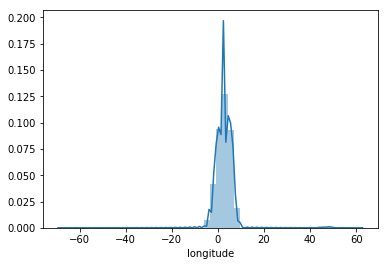

In [45]:
sns.distplot(pdv.longitude)

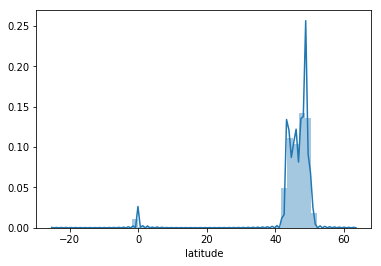

In [46]:
sns.distplot(pdv.latitude)

In [13]:
pdv.latitude.describe()

count    1.396480e+05
mean     4.608540e+06
std      6.176435e+05
min     -2.433288e+06
25%      4.476511e+06
50%      4.715301e+06
75%      4.876788e+06
max      6.260656e+06
Name: latitude, dtype: float64

In [7]:
pdv.loc[pdv.cp=="35***","cp"] = 35000

In [28]:
!pip install pgeocode

postal_code                 75013
country code                   FR
place_name        Paris 13, Paris
state_name          Île-de-France
state_code                     11
                       ...       
community_name              Paris
community_code                751
latitude                  48.8322
longitude                 2.35245
accuracy                        5
Name: 0, Length: 12, dtype: object

In [30]:
pdv.loc[(pdv.adresse == ad) & (pdv.ville.isna())]

,annee,id,latitude,longitude,cp,pop,ouverture_debut,ouverture_fin,ouverture_saufjour,adresse,ville


In [31]:
pdv.isna().sum()

annee                      0
id                         0
latitude                1076
longitude               1053
cp                         0
                       ...  
ouverture_debut        25498
ouverture_fin          25498
ouverture_saufjour    119101
adresse                    0
ville                      0
Length: 11, dtype: int64

In [32]:
# normalisation des longitudes et latitude 
pdv.loc[:,'latitude']   = pdv.latitude/100000
pdv.loc[:, 'longitude'] = pdv.longitude/100000

In [33]:
pdv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140724 entries, 0 to 140723
Data columns (total 11 columns):
annee                 140724 non-null int64
id                    140724 non-null int64
latitude              139648 non-null float64
longitude             139671 non-null float64
cp                    140724 non-null object
pop                   140724 non-null object
ouverture_debut       115226 non-null object
ouverture_fin         115226 non-null object
ouverture_saufjour    21623 non-null object
adresse               140724 non-null object
ville                 140724 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 11.8+ MB


- **convertion des categories**

In [34]:
findLargeCols(pdv)

col_name                            n               n_distinct     ratio
annee                              140724                   13    10825%
id                                 140724                16826        8%
latitude                           140724                19737        7%
longitude                          140724                20006        7%
cp                                 140724                 8770       16%
pop                                140724                    4    35181%
ouverture_debut                    140724                  766      184%
ouverture_fin                      140724                  880      160%
ouverture_saufjour                 140724                   32     4398%
adresse                            140724                15393        9%
ville                              140724                 9174       15%


les columns **'annee','pop','ouverture_saufjour','rupture_id','rupture_nom','fermeture_type'** mieux vaut les considérer des categories

In [35]:
pdv['annee']              = pdv['annee'].astype('category')
pdv['pop']                = pdv['pop'].astype('category')
pdv['ouverture_saufjour'] = pdv['ouverture_saufjour'].astype('category')
pdv['rupture_id']         = pdv['rupture_id'].astype('category')
pdv['rupture_nom']        = pdv['rupture_nom'].astype('category')
pdv['fermeture_type']     = pdv['fermeture_type'].astype('category')


KeyError: 'rupture_id'

- **convertion des dates et temps**

In [11]:
mask = pdv['ouverture_debut'].str.len() == 5
pdv.loc[mask,'ouverture_debut'] = pdv.loc[mask,'ouverture_debut'] + ":00"

In [12]:
mask = pdv['ouverture_fin'].str.len() == 5
pdv.loc[mask,'ouverture_fin'] = pdv.loc[mask,'ouverture_fin'] + ":00"

In [13]:
mask = pdv['rupture_debut'].str[:4] == "0216"
pdv.loc[mask,'rupture_debut'] = "2016" + pdv[mask]['rupture_debut'].str[4:]

KeyError: 'rupture_debut'

In [77]:
mask = pdv['rupture_debut'].str[:4] == "0216"
pdv[mask]['rupture_debut']

Series([], Name: rupture_debut, dtype: object)

In [14]:
pdv['ouverture_debut'] = pd.to_timedelta((pdv['ouverture_debut']))
pdv['ouverture_fin']   = pd.to_timedelta((pdv['ouverture_fin']))

In [15]:
pdv['ouverture_debut'][136707] , pdv['ouverture_fin'][136707]

(Timedelta('0 days 01:00:00'), Timedelta('0 days 01:00:00'))

In [16]:
pdv['ouverture_fin'][136707] - pdv['ouverture_debut'][136707]

Timedelta('0 days 00:00:00')

In [17]:
pdv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140724 entries, 0 to 140723
Data columns (total 11 columns):
annee                 140724 non-null int64
id                    140724 non-null int64
latitude              139648 non-null float64
longitude             139671 non-null float64
cp                    140724 non-null object
pop                   140724 non-null object
ouverture_debut       128011 non-null timedelta64[ns]
ouverture_fin         128011 non-null timedelta64[ns]
ouverture_saufjour    21623 non-null object
adresse               140724 non-null object
ville                 140724 non-null object
dtypes: float64(2), int64(2), object(5), timedelta64[ns](2)
memory usage: 11.8+ MB


In [18]:
pdv['rupture_debut']   = pd.to_datetime(pdv['rupture_debut'])
pdv['rupture_fin']     = pd.to_datetime(pdv['rupture_fin'])
pdv['fermeture_debut'] = pd.to_datetime(pdv['fermeture_debut'])
pdv['fermeture_fin']   = pd.to_datetime(pdv['fermeture_fin'])

KeyError: 'rupture_debut'

In [23]:
pdv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136712 entries, 0 to 136711
Data columns (total 18 columns):
annee                 136712 non-null category
id                    136712 non-null int64
latitude              135706 non-null float64
longitude             135728 non-null float64
cp                    136712 non-null object
pop                   136712 non-null category
ouverture_debut       124114 non-null timedelta64[ns]
ouverture_fin         124114 non-null timedelta64[ns]
ouverture_saufjour    136712 non-null category
adresse               136712 non-null object
ville                 136709 non-null object
rupture_id            136712 non-null category
rupture_nom           136712 non-null category
rupture_debut         136712 non-null datetime64[ns]
rupture_fin           44013 non-null datetime64[ns]
fermeture_type        136669 non-null category
fermeture_debut       136669 non-null datetime64[ns]
fermeture_fin         39851 non-null datetime64[ns]
dtypes: category(6

In [98]:
pdv

,annee,id,latitude,longitude,cp,pop,ouverture_debut,ouverture_fin,ouverture_saufjour,adresse,ville,rupture_id,rupture_nom,rupture_debut,rupture_fin,fermeture_type,fermeture_debut,fermeture_fin
0,2007,1000001,4.620114e+06,519791.000000,01000,R,01:00:00,01:00:00,NaN,ROUTE NATIONALE,S-BOURG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,1000002,4.621842e+06,522767.000000,01000,R,08:45:00,19:30:00,Dimanche,16 Avenue de Marboz,BOURG-EN-BRESSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,1000003,4.619965e+06,524047.000000,01000,R,16:00:00,20:00:00,Samedi;Dimanche,Bld Charles De Gaulle,Bourg-en-Bresse,NaN,NaN,NaN,NaN,D,2007-10-30 09:47:04.590533,NaN
3,2007,1000004,4.618836e+06,524447.000000,01000,R,01:00:00,01:00:00,NaN,chal Juin,Bourg-en-Bresse,NaN,NaN,NaN,NaN,D,2007-10-30 09:47:04.590533,NaN
4,2007,1000006,4.620754e+06,523758.000000,01000,R,01:00:00,01:00:00,Dimanche,1 Boulevard John Kennedy,BOURG-EN-BRESSE,NaN,NaN,NaN,NaN,D,2007-10-30 09:47:04.590533,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140719,2017,95870005,4.893676e+06,220715.000000,95870,R,06:00:43,21:00:43,NaN,ri,BEZONS,2.0,SP95,2013-03-20T16:58:00,NaN,D,2017-12-19T00:00:00,NaN
140720,2017,95870007,4.892824e+06,221140.000000,95870,R,06:00:01,21:00:01,NaN,ri,BEZONS,2.0,SP95,2011-08-31T22:43:00,NaN,D,2017-12-19T00:00:00,NaN
140721,2017,95870009,4.892770e+06,221346.318047,95870,R,06:00:00,21:30:00,NaN,151 AV GABRIEL PERI,BEZONS,2.0,SP95,2011-08-31T22:43:00,NaN,D,2017-12-19T00:00:00,NaN
140722,2017,96600001,4.875637e+06,241048.000000,94600,R,07:30:27,20:30:27,Dimanche,16 Avenue de Newburn,Choisy-le-Roi,5.0,E10,2009-12-11T21:53:00,NaN,D,2017-12-19T00:00:00,NaN


- **enregistrer la df compréssée**

In [36]:
pdv.to_parquet('pdv.gzip', 
               compression='gzip')

- **liberer la mémoire**

In [37]:
del pdv

### netoyage de **prix**

In [38]:
prix = pd.read_csv('prix.csv')

In [39]:
prix

,annee,id_pdv,nom,id,maj,valeur
0,2019,1000001,Gazole,1.0,2019-01-04T10:53:48,1328.0
1,2019,1000001,Gazole,1.0,2019-01-07T10:25:25,1348.0
2,2019,1000001,Gazole,1.0,2019-01-10T08:54:28,1374.0
3,2019,1000001,Gazole,1.0,2019-01-11T10:01:54,1387.0
4,2019,1000001,Gazole,1.0,2019-01-14T11:04:53,1394.0
...,...,...,...,...,...,...
28552949,2016,95870009,SP98,6.0,2016-12-28T00:12:00,1427.0
28552950,2016,95870009,SP98,6.0,2016-12-29T00:12:00,1427.0
28552951,2016,95870009,SP98,6.0,2016-12-30T00:12:00,1432.0
28552952,2016,95870009,SP98,6.0,2016-12-31T00:12:00,1439.0


In [40]:
prix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28552954 entries, 0 to 28552953
Data columns (total 6 columns):
annee     int64
id_pdv    int64
nom       object
id        float64
maj       object
valeur    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ GB


**la DataFrame prix est trés grande (1,3 GB).On peut diminuer sa taille en convertant des variables en Category.**

- **convertion des categories**

In [41]:
findLargeCols(prix)

col_name                            n               n_distinct     ratio
annee                            28552954                   13  2196381%
id_pdv                           28552954                16826     1697%
nom                              28552954                    7  4078993%
id                               28552954                    7  4078993%
maj                              28552954             11299903        3%
valeur                           28552954                 1944    14688%


les columns **'id_pdv','annee','nom','id'** mieux vaut les considérer des categories. on laisse **'valeur'** en **int**

In [42]:
prix["id_pdv"] = prix["id_pdv"].astype('category')
prix["annee"]  = prix["annee"].astype('category')
prix["nom"]    = prix["nom"].astype('category')
prix["id"]     = prix["id"].astype('category')

In [43]:
prix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28552954 entries, 0 to 28552953
Data columns (total 6 columns):
annee     category
id_pdv    category
nom       category
id        category
maj       object
valeur    float64
dtypes: category(4), float64(1), object(1)
memory usage: 572.6+ MB


**la taille de la df diminue de 1.3GB à 0.57GB**

- **convertion des dates et temps**

In [44]:
prix['maj'] = pd.to_datetime(prix['maj'])

In [45]:
prix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28552954 entries, 0 to 28552953
Data columns (total 6 columns):
annee     category
id_pdv    category
nom       category
id        category
maj       datetime64[ns]
valeur    float64
dtypes: category(4), datetime64[ns](1), float64(1)
memory usage: 572.6 MB


In [46]:
prix

,annee,id_pdv,nom,id,maj,valeur
0,2019,1000001,Gazole,1.0,2019-01-04 10:53:48,1328.0
1,2019,1000001,Gazole,1.0,2019-01-07 10:25:25,1348.0
2,2019,1000001,Gazole,1.0,2019-01-10 08:54:28,1374.0
3,2019,1000001,Gazole,1.0,2019-01-11 10:01:54,1387.0
4,2019,1000001,Gazole,1.0,2019-01-14 11:04:53,1394.0
...,...,...,...,...,...,...
28552949,2016,95870009,SP98,6.0,2016-12-28 00:12:00,1427.0
28552950,2016,95870009,SP98,6.0,2016-12-29 00:12:00,1427.0
28552951,2016,95870009,SP98,6.0,2016-12-30 00:12:00,1432.0
28552952,2016,95870009,SP98,6.0,2016-12-31 00:12:00,1439.0


- **enregistrer la df compréssée**

In [47]:
prix.to_parquet('prix.gzip',
               compression='gzip')

- **liberer la mémoire**

In [48]:
del prix

### netoyage de **services**

In [49]:
services = pd.read_csv('services.csv')

In [50]:
services

,annee,id_pdv,service
0,2019,1000001,Station de gonflage
1,2019,1000001,"Vente de gaz domestique (Butane, Propane)"
2,2019,1000001,DAB (Distributeur automatique de billets)
3,2019,1000002,"Vente de gaz domestique (Butane, Propane)"
4,2019,1000002,DAB (Distributeur automatique de billets)
...,...,...,...
837086,2016,95870009,Lavage multi-programmes
837087,2016,96600001,Carburant qualité supérieure
837088,2016,96600001,Boutique non alimentaire
837089,2016,96600001,Baie de service auto


In [51]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837091 entries, 0 to 837090
Data columns (total 3 columns):
annee      837091 non-null int64
id_pdv     837091 non-null int64
service    837091 non-null object
dtypes: int64(2), object(1)
memory usage: 19.2+ MB


- **convertion des categories**

In [52]:
findLargeCols(services)

col_name                            n               n_distinct     ratio
annee                              837091                   13    64392%
id_pdv                             837091                15179       55%
service                            837091                   36    23253%


les columns **'annee','id_pdv','service'** mieux vaut les considérer des categories.

In [53]:
services["annee"]   = services["annee"].astype('category')
services["id_pdv"]  = services["id_pdv"].astype('category')
services["service"] = services["service"].astype('category')

In [54]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837091 entries, 0 to 837090
Data columns (total 3 columns):
annee      837091 non-null category
id_pdv     837091 non-null category
service    837091 non-null category
dtypes: category(3)
memory usage: 3.9 MB


In [56]:
services

,annee,id_pdv,service
0,2019,1000001,Station de gonflage
1,2019,1000001,"Vente de gaz domestique (Butane, Propane)"
2,2019,1000001,DAB (Distributeur automatique de billets)
3,2019,1000002,"Vente de gaz domestique (Butane, Propane)"
4,2019,1000002,DAB (Distributeur automatique de billets)
...,...,...,...
837086,2016,95870009,Lavage multi-programmes
837087,2016,96600001,Carburant qualité supérieure
837088,2016,96600001,Boutique non alimentaire
837089,2016,96600001,Baie de service auto


- **enregistrer la df compréssée**

In [57]:
services.to_parquet('services.gzip',
               compression='gzip')

- **liberer la mémoire**

In [58]:
del services